<a href="https://colab.research.google.com/github/Milad-Khanchi/Machine_Learning/blob/main/Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:

number of instances = 768
Number of NA/NULL data:
0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
Correlation berween the features and Y_1:
0
X1    0.622272
X2   -0.658120
X3    0.455671
X4   -0.861828
X5    0.889430
X7    0.269842
Y1    1.000000
Y2    0.975862
Name: Y1, dtype: float64
Correlation berween the features and Y_2:
0
X1    0.634339
X2   -0.672999
X3    0.427117
X4   -0.862547
X5    0.895785
X7    0.207505
Y1    0.975862
Y2    1.000000
Name: Y2, dtype: float64


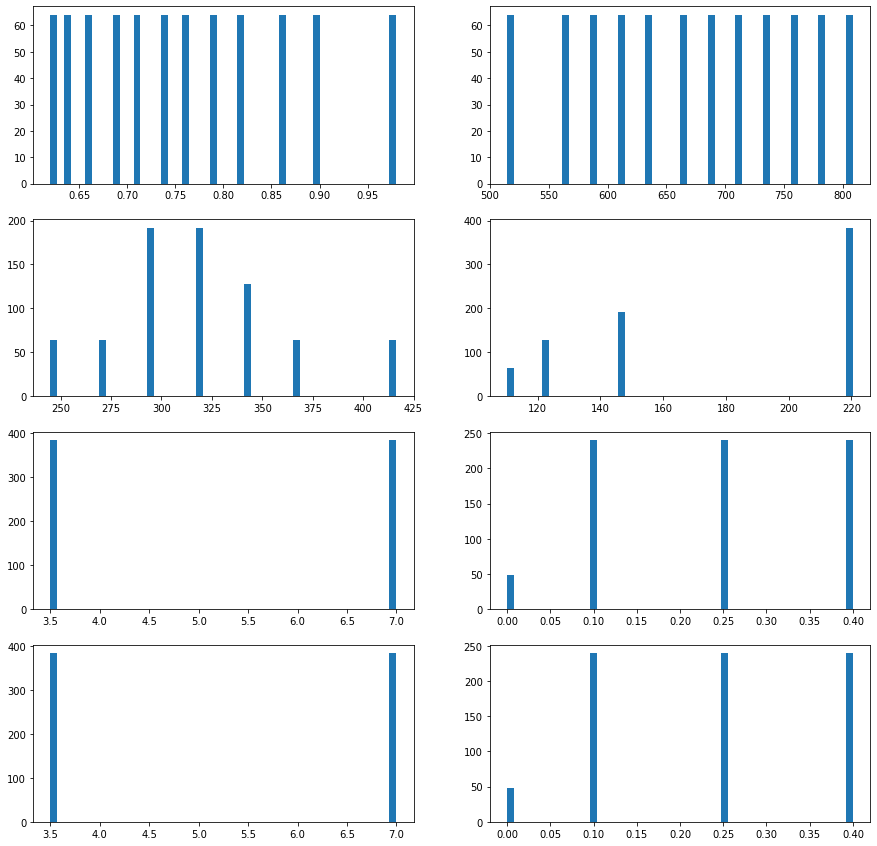

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
number of instances = 250
Number of NA/NULL data:
Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64
Industrial Risk          float64
Management Risk          float64
Financial Flexibility    float64
Credibility              float64
Competitiveness          float64
Operating Risk           float64
Class                    float64
dtype: object
Number of classes labeled as B: 107
Number of classes labeled as NB: 143


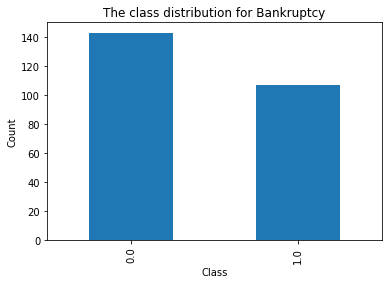

Correlation berween the features and Y:
Management Risk         -0.370838
Financial Flexibility   -0.751020
Credibility             -0.755909
Competitiveness         -0.899452
Class                    1.000000
Name: Class, dtype: float64


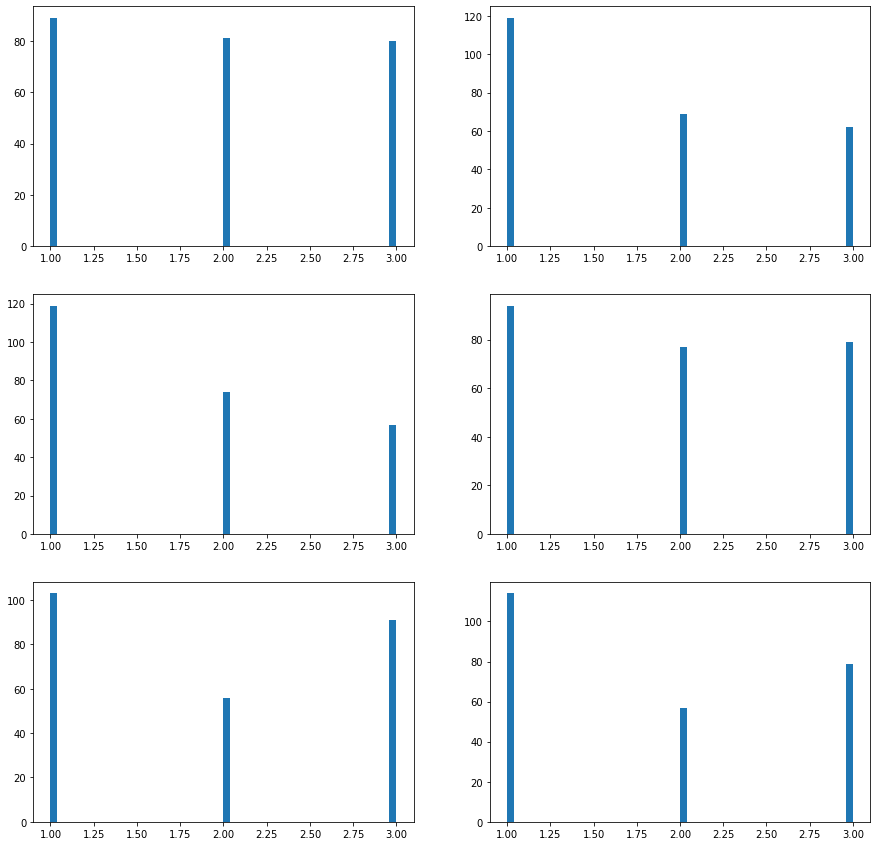

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from google.colab import files
from google.colab import drive
# statistical study for dataset 1 (Energy efficiency)
url_E = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
Data_E = pd.read_excel(url_E, header=None)
new_header = Data_E.iloc[0] #grab the first row for the header
Data_E = Data_E[1:] #take the data less the header row
Data_E.columns = new_header #set the header row as the df header
print('number of instances =', len(Data_E.index))
print("Number of NA/NULL data:")
print(Data_E[Data_E == '?'].count())
#Data_E.iloc[1:,1:] = Data_E.iloc[1:,1:].astype(float, errors = 'raise')
convert_dict_E = {
                'X2': float,'X3': float,'X4': float,'X5': float,'X6': float,'X7': float,'X8': float,'X1':float, 'Y1': float, 'Y2': float
                }
Data_E = Data_E.astype(convert_dict_E)
#Data_E.describe()
print("Correlation berween the features and Y_1:")
print(Data_E.corr()['Y1'].loc[abs(Data_E.corr()['Y1']) > 0.2])
print("Correlation berween the features and Y_2:")
print(Data_E.corr()['Y2'].loc[abs(Data_E.corr()['Y2']) > 0.2])
data_e = Data_E[Data_E.corr()['Y1'].loc[abs(Data_E.corr()['Y1']) > 0.2].index].to_numpy()
Data_E=Data_E.to_numpy()
fig, ax = plt.subplots(4,2,figsize=(15,15))
ax[0,0].hist(Data_E[:,0], bins = 50)
ax[0,1].hist(Data_E[:,1], bins = 50)
ax[1,0].hist(Data_E[:,2], bins = 50)
ax[1,1].hist(Data_E[:,3], bins = 50)
ax[2,0].hist(Data_E[:,4], bins = 50)
ax[2,1].hist(Data_E[:,6], bins = 50)
ax[3,0].hist(Data_E[:,4], bins = 50)
ax[3,1].hist(Data_E[:,6], bins = 50)
# Show plot
plt.show()

# statistical study for dataset 2 (Bankruptcy)
from google.colab import drive
drive.mount('/content/drive')
columns_B = ['Industrial Risk', 'Management Risk', 'Financial Flexibility',
             'Credibility', 'Competitiveness', 'Operating Risk', 'Class']
Data_B = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Qualitative_Bankruptcy.data.txt",
                     header=None, names=columns_B)
print('number of instances =', len(Data_B.index))
print("Number of NA/NULL data:")
print(Data_B[Data_B == '?'].count())
data_B=Data_B.copy()
data_B['Class'] = data_B['Class'].replace('NB','0')
data_B['Class'] = data_B['Class'].replace('B','1')
data_B = data_B.replace('N','1', regex=True)
data_B = data_B.replace('A','2', regex=True)
data_B = data_B.replace('P','3', regex=True)
#data_B.iloc[:,1:] = data_B.iloc[:,1:].astype(float, errors = 'raise')
convert_dict_B = {'Industrial Risk': float,
                'Management Risk': float,
                'Financial Flexibility': float,
                'Credibility': float,
                'Competitiveness': float,
                'Operating Risk': float, 'Class': float

                }
data_B = data_B.astype(convert_dict_B)
print(data_B.dtypes)
#data_B.describe()
print('Number of classes labeled as B:', data_B['Class'][~(data_B['Class'] == 0)].count())
print('Number of classes labeled as NB:', data_B['Class'][data_B['Class'] == 0].count())
pd.value_counts(data_B['Class']).plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('The class distribution for Bankruptcy')
plt.show()
print("Correlation berween the features and Y:")
print(data_B.corr()['Class'].loc[abs(data_B.corr()['Class']) > 0.3])
data_b = data_B[data_B.corr()['Class'].loc[abs(data_B.corr()['Class']) > 0.3].index].to_numpy()
data_B=data_B.to_numpy()
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax[0,0].hist(data_B[:,0], bins = 50)
ax[0,1].hist(data_B[:,1], bins = 50)
ax[1,0].hist(data_B[:,2], bins = 50)
ax[1,1].hist(data_B[:,3], bins = 50)
ax[2,0].hist(data_B[:,4], bins = 50)
ax[2,1].hist(data_B[:,5], bins = 50)
#print(Data_E[:,:1])
# Show plot
plt.show()

Task 2:

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
!pip install -q xlrd

In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data1 = pd.DataFrame(data1)
data1

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/COMP551/Prj1/Qualitative_Bankruptcy")

In [ ]:
data2 = pd.read_csv("Qualitative_Bankruptcy.data.txt")
data2 = pd.DataFrame(data2)
data2

P P.1  A A.1 A.2 P.2  NB
0    N   N  A   A   A   N  NB
1    A   A  A   A   A   A  NB
2    P   P  P   P   P   P  NB
3    N   N  P   P   P   N  NB
4    A   A  P   P   P   A  NB
..  ..  .. ..  ..  ..  ..  ..
244  N   N  A   N   N   N   B
245  P   N  N   N   N   N   B
246  A   N  N   N   N   N   B
247  N   N  N   N   N   N   B
248  P   N  N   N   A   A   B

[249 rows x 7 columns]

Change Parameters to binary:

In [ ]:
data2 = data2.replace('B',1)
data2 = data2.replace('NB',0)
data2 = data2.replace('N' , 1)
data2 = data2.replace('A' , 2)
data2 = data2.replace('P' , 3)
data2

P  P.1  A  A.1  A.2  P.2  NB
0    1    1  2    2    2    1   0
1    2    2  2    2    2    2   0
2    3    3  3    3    3    3   0
3    1    1  3    3    3    1   0
4    2    2  3    3    3    2   0
..  ..  ... ..  ...  ...  ...  ..
244  1    1  2    1    1    1   1
245  3    1  1    1    1    1   1
246  2    1  1    1    1    1   1
247  1    1  1    1    1    1   1
248  3    1  1    1    2    2   1

[249 rows x 7 columns]

(For Task 2) Split datasets into train and test:

Dataset1:

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Dataset2:

In [ ]:
train_data2 = data2.sample(frac = 0.8, random_state = 30)
test_data2  = data2.drop(train_data2.index)

Task 2:

(1) Linear Regression for Dataset1:

Linear Regression function:

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def getw(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self.w

    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

Unnormalized:

In [ ]:
x_train1 = train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


$\hat{Y}_1$ and $\hat{Y}_2$ Prediction:

In [ ]:
Linear_model = LinearRegression()
yh_data1 = Linear_model.fit(x = x_train1, y = y_train1).predict(x = x_test1)


<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Show Predicted ($\hat{Y}_1$) and real value ($Y_1$):

In [ ]:
# figure, axes = plt.subplots(ncols = 2, nrows = 1, constrained_layout=True, figsize=(26, 5))
# axes[0].plot(y_test1[:, [0]], label = 'real y', color = 'r')
# axes[0].plot(yh_data1[:, [0]], label = 'predicted y')
# axes[1].plot(y_test1[:, [1]], label = 'real y', color = 'r')
# axes[1].plot(yh_data1[:, [1]], label = 'predicted y')
# plt.legend()
# plt.show()


Calculate the MSE (Total $\hat{Y}_1$ and $\hat{Y}_2$):

In [ ]:
def MSE(y_TR,yHAT):
    m = 0.5*np.square(np.subtract(y_TR,yHAT)).mean()
    return m

In [ ]:
MSE(y_test1,yh_data1)


4.172583053746655

Calculate the MSE ($\hat{Y}_1$):

In [ ]:
MSE(y_test1[:,0],yh_data1[:,0])


3.801451166438789

Calculate the MSE ($\hat{Y}_2$):

In [ ]:
MSE(y_test1[:,1],yh_data1[:,1])


4.543714941054523

Normalized Data:

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


$\hat{Y}_1$ and $\hat{Y}_2$ Prediction:

In [ ]:
Linear_model = LinearRegression()
yh_data1 = Linear_model.fit(x = x_train1, y = y_train1).predict(x = x_test1)


<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

In [ ]:
# figure, axes = plt.subplots(ncols = 2, nrows = 1, constrained_layout=True, figsize=(26, 5))
# axes[0].plot(y_test1[:, [0]], label = 'real y', color = 'r')
# axes[0].plot(yh_data1[:, [0]], label = 'predicted y')
# axes[1].plot(y_test1[:, [1]], label = 'real y', color = 'r')
# axes[1].plot(yh_data1[:, [1]], label = 'predicted y')
# plt.legend()
# plt.show()


Calculate the MSE (Total $\hat{Y}_1$ and $\hat{Y}_2$):

In [ ]:
MSE(y_test1,yh_data1)


3.7538593502767514

Calculate the MSE ($\hat{Y}_1$):

In [ ]:
MSE(y_test1[:,0],yh_data1[:,0])


3.3202246977286762

Calculate the MSE ($\hat{Y}_2$):

In [ ]:
MSE(y_test1[:,1],yh_data1[:,1])


4.1874940028248275

Plot Based on Features:

In [ ]:
Linear_model = LinearRegression()
w_data1 = Linear_model.getw(x = x_train1, y = y_train1)

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


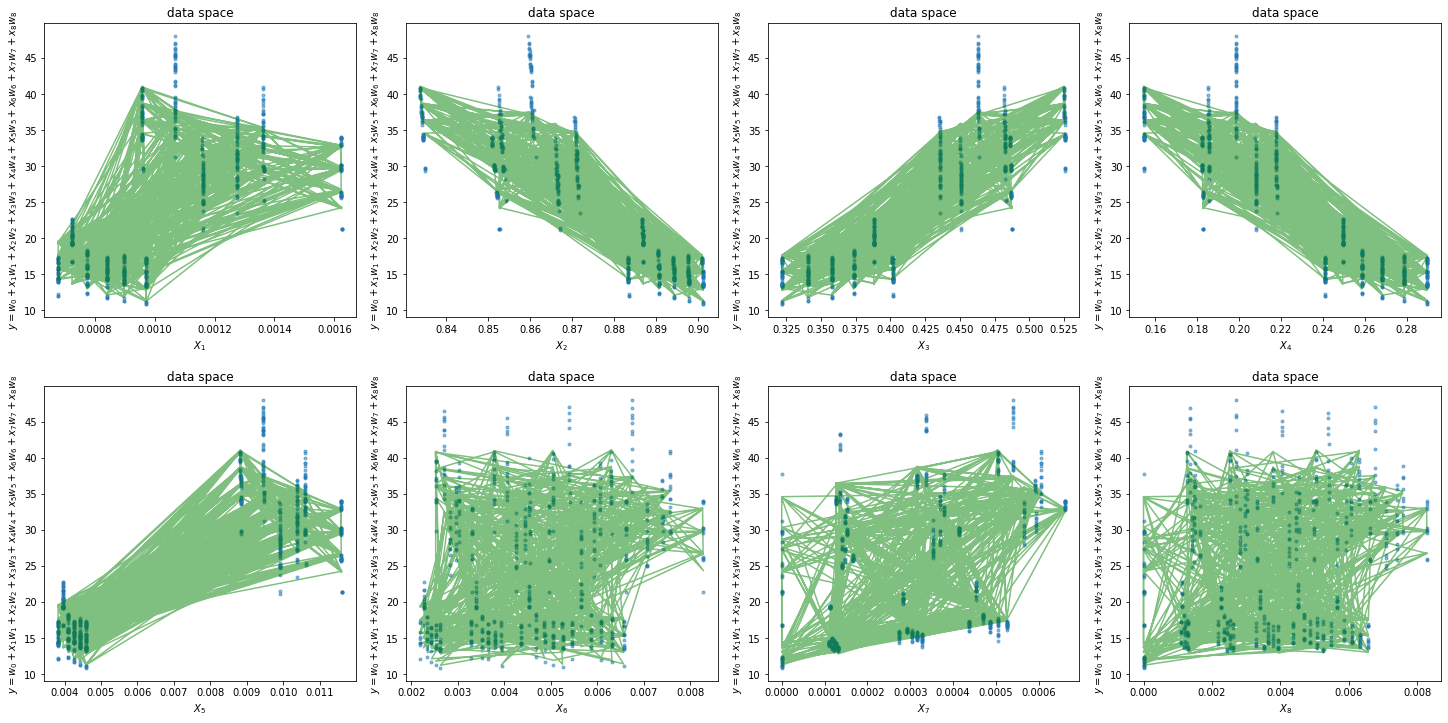

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(20, 10))
colors = ['r','g', 'b', 'k','y']
T = len(x_train1)

for i in range(0,4):
  axes[0][i].plot(x_train1[:T,i], y_train1[:T,1], '.', alpha=.5)                                 #plot the points
  axes[0][i].plot(x_train1[:T,i], w_data1[:,1][-1] + w_data1[:,1][0]*x_train1[:T,0] + w_data1[:,1][1]*x_train1[:T,1] + w_data1[:,1][2]*x_train1[:T,2] + w_data1[:,1][3]*x_train1[:T,3] + w_data1[:,1][4]*x_train1[:T,4] + w_data1[:,1][5]*x_train1[:T,5] + w_data1[:,1][6]*x_train1[:T,6] + w_data1[:,1][7]*x_train1[:T,7], '-'+colors[1], alpha=.5)   #plot the lines
  axes[0][i].set_xlabel('$X_%i$' %(i+1))
  axes[0][i].set_ylabel(r'$y=w_0 + x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6 + x_7w_7 + x_8w_8$')
  axes[0][i].set_title('data space')

for i in range(4,8):
  axes[1][i-4].plot(x_train1[:T,i], y_train1[:T,1], '.', alpha=.5)                                 #plot the points
  axes[1][i-4].plot(x_train1[:T,i], w_data1[:,1][-1] + w_data1[:,1][0]*x_train1[:T,0] + w_data1[:,1][1]*x_train1[:T,1] + w_data1[:,1][2]*x_train1[:T,2] + w_data1[:,1][3]*x_train1[:T,3] + w_data1[:,1][4]*x_train1[:T,4] + w_data1[:,1][5]*x_train1[:T,5] + w_data1[:,1][6]*x_train1[:T,6] + w_data1[:,1][7]*x_train1[:T,7], '-'+colors[1], alpha=.5)   #plot the lines
  axes[1][i-4].set_xlabel('$X_%i$' %(i+1))
  axes[1][i-4].set_ylabel(r'$y=w_0 + x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6 + x_7w_7 + x_8w_8$')
  axes[1][i-4].set_title('data space')

plt.show()

Plot based on features in small instance:

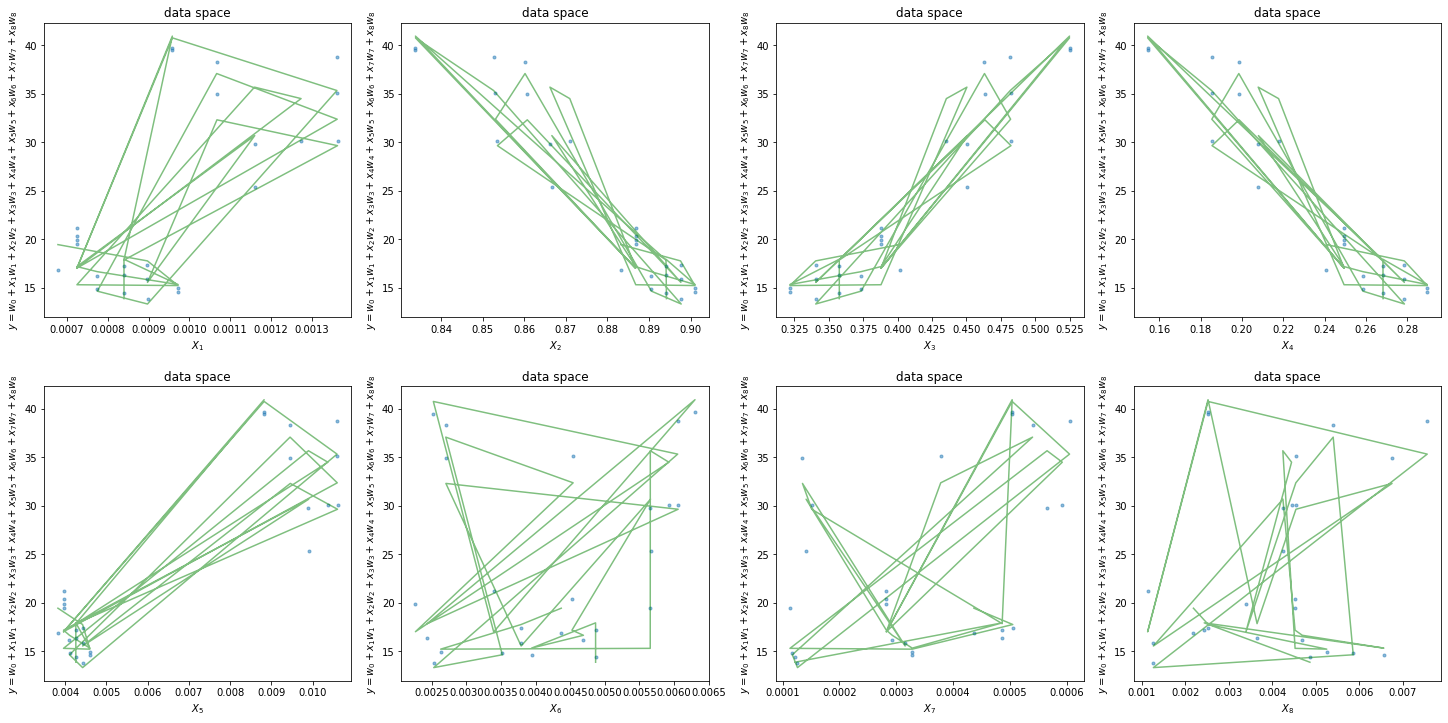

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(20, 10))
colors = ['r','g', 'b', 'k','y']
T = 25

for i in range(0,4):
  axes[0][i].plot(x_train1[:T,i], y_train1[:T,1], '.', alpha=.5)                                 #plot the points
  axes[0][i].plot(x_train1[:T,i], w_data1[:,1][-1] + w_data1[:,1][0]*x_train1[:T,0] + w_data1[:,1][1]*x_train1[:T,1] + w_data1[:,1][2]*x_train1[:T,2] + w_data1[:,1][3]*x_train1[:T,3] + w_data1[:,1][4]*x_train1[:T,4] + w_data1[:,1][5]*x_train1[:T,5] + w_data1[:,1][6]*x_train1[:T,6] + w_data1[:,1][7]*x_train1[:T,7], '-'+colors[1], alpha=.5)   #plot the lines
  axes[0][i].set_xlabel('$X_%i$' %(i+1))
  axes[0][i].set_ylabel(r'$y=w_0 + x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6 + x_7w_7 + x_8w_8$')
  axes[0][i].set_title('data space')

for i in range(4,8):
  axes[1][i-4].plot(x_train1[:T,i], y_train1[:T,1], '.', alpha=.5)                                 #plot the points
  axes[1][i-4].plot(x_train1[:T,i], w_data1[:,1][-1] + w_data1[:,1][0]*x_train1[:T,0] + w_data1[:,1][1]*x_train1[:T,1] + w_data1[:,1][2]*x_train1[:T,2] + w_data1[:,1][3]*x_train1[:T,3] + w_data1[:,1][4]*x_train1[:T,4] + w_data1[:,1][5]*x_train1[:T,5] + w_data1[:,1][6]*x_train1[:T,6] + w_data1[:,1][7]*x_train1[:T,7], '-'+colors[1], alpha=.5)   #plot the lines
  axes[1][i-4].set_xlabel('$X_%i$' %(i+1))
  axes[1][i-4].set_ylabel(r'$y=w_0 + x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6 + x_7w_7 + x_8w_8$')
  axes[1][i-4].set_title('data space')

plt.show()

Plot Real outputs Vs Predicted outputs:

Text(0, 0.5, 'Predicted outputs ($\\hat{Y}_2$)')

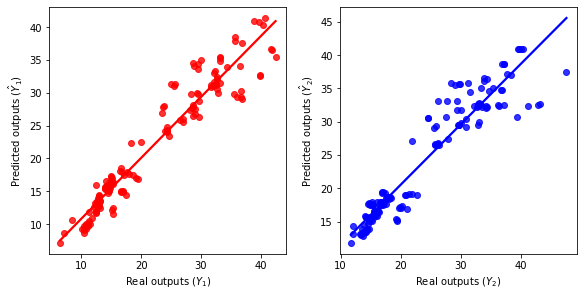

In [ ]:
import seaborn as sns

fig, (axe1, axe2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(8, 4))

sns.regplot(x = y_test1[:,0], y =  yh_data1[:,0], ci=None, color = 'red', label = 'Predicted', ax = axe1)
sns.regplot(x = y_test1[:,1], y =  yh_data1[:,1], ci=None, color = 'blue', label = 'Predicted', ax= axe2)

axe1.set_xlabel('Real outputs ($Y_1$)')
axe2.set_xlabel('Real outputs ($Y_2$)')
axe1.set_ylabel('Predicted outputs ($\hat{Y}_1$)')
axe2.set_ylabel('Predicted outputs ($\hat{Y}_2$)')

Find the Slope:

In [ ]:
!pip install scipy
import scipy as scipy
from scipy.stats import linregress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For $\hat{Y}_1$:

0.9253413797976093

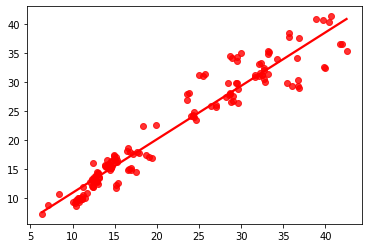

In [ ]:
p = sns.regplot(x = y_test1[:,0], y =  yh_data1[:,0], ci=None, color = 'red', label = 'Predicted')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = p.get_lines()[0].get_xdata(), y = p.get_lines()[0].get_ydata())
slope

For $\hat{Y}_2$:

0.9077919080524234

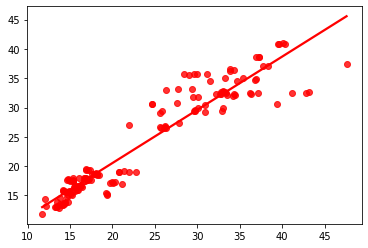

In [ ]:
p = sns.regplot(x = y_test1[:,1], y =  yh_data1[:,1], ci=None, color = 'red', label = 'Predicted')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = p.get_lines()[0].get_xdata(), y = p.get_lines()[0].get_ydata())
slope

Show weights ($\hat{W}$) with $Y_1$:

Normalized:

In [ ]:
Linear_model = LinearRegression()
w_data1 = Linear_model.getw(x = x_train1, y = y_train1)

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    #function to plot the contours where f is the cost function
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


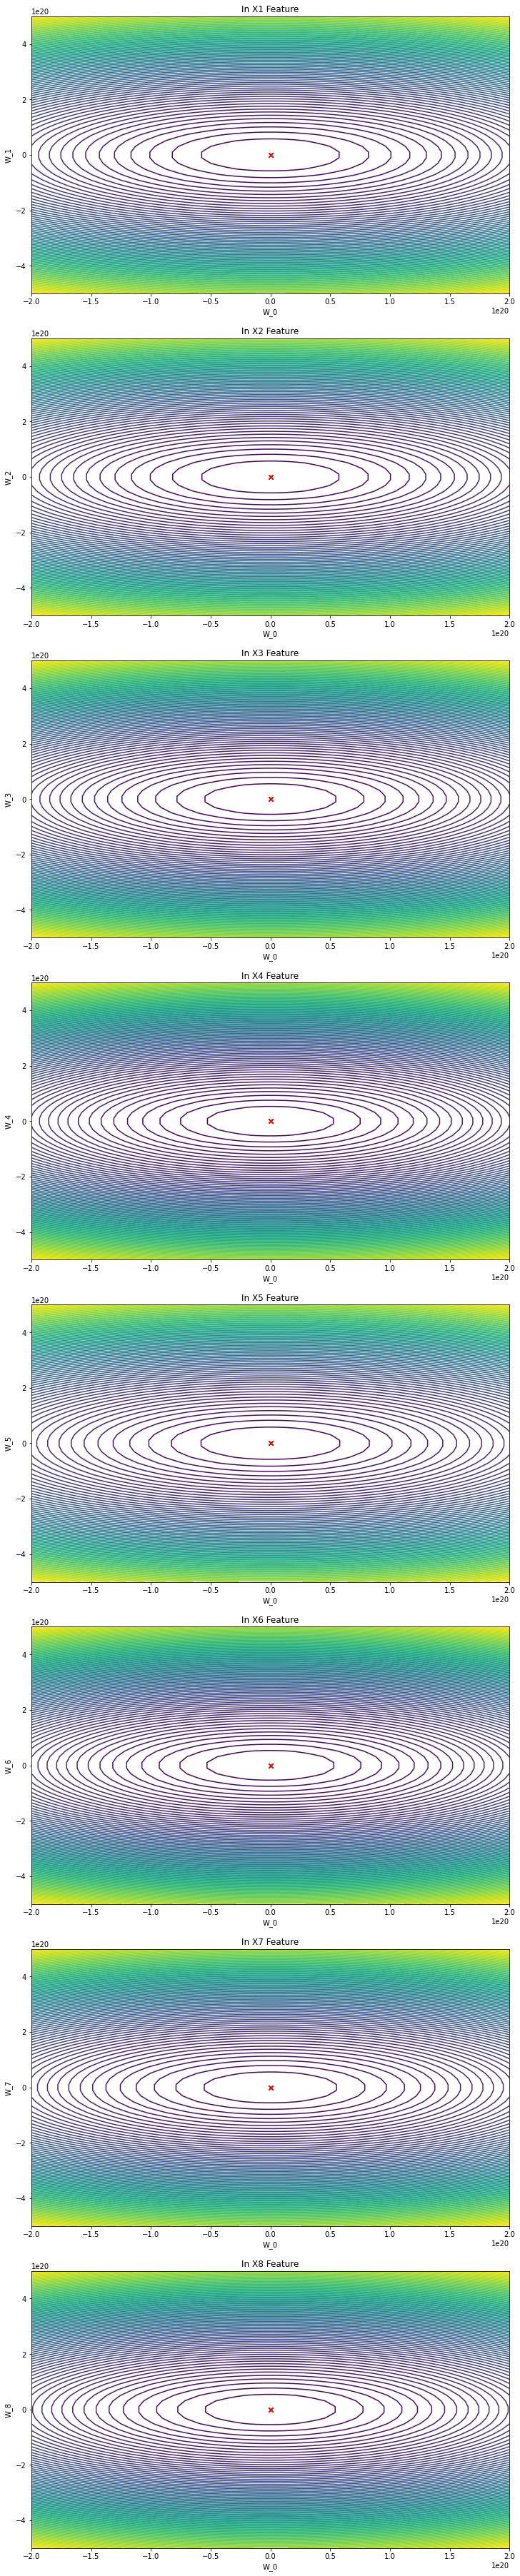

In [ ]:
model_list = Linear_model.getw(x = x_train1, y = y_train1[:,0])            #different weights

fig, axes = plt.subplots(ncols=1, nrows= 8, constrained_layout=True, figsize=(10, 50))
colors = ['r','g', 'b', 'k','y', 'p', 'w', 'br']
for q in range(8):
    cost = lambda w: .5*np.mean((model_list[0] + w*test_data1.loc[:, ['X'+str(q+1)]].to_numpy() - test_data1.loc[:, ['Y1']].to_numpy())**2)         #function to compute the cost
    plot_contour(cost, [-2e+20,2e+20], [-5e+20,5e+20], 50, axes[q])
    for w in model_list:
      axes[q].plot(model_list[0], w, 'x'+colors[0])                 #plot the contours
      axes[q].set_xlabel(r'W_0')
      axes[q].set_ylabel(r'W_'+str(q+1))
      axes[q].set_title('In X'+str(q+1)+' Feature')

plt.show()

Show weights ($\hat{W}$) with $Y_2$:

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


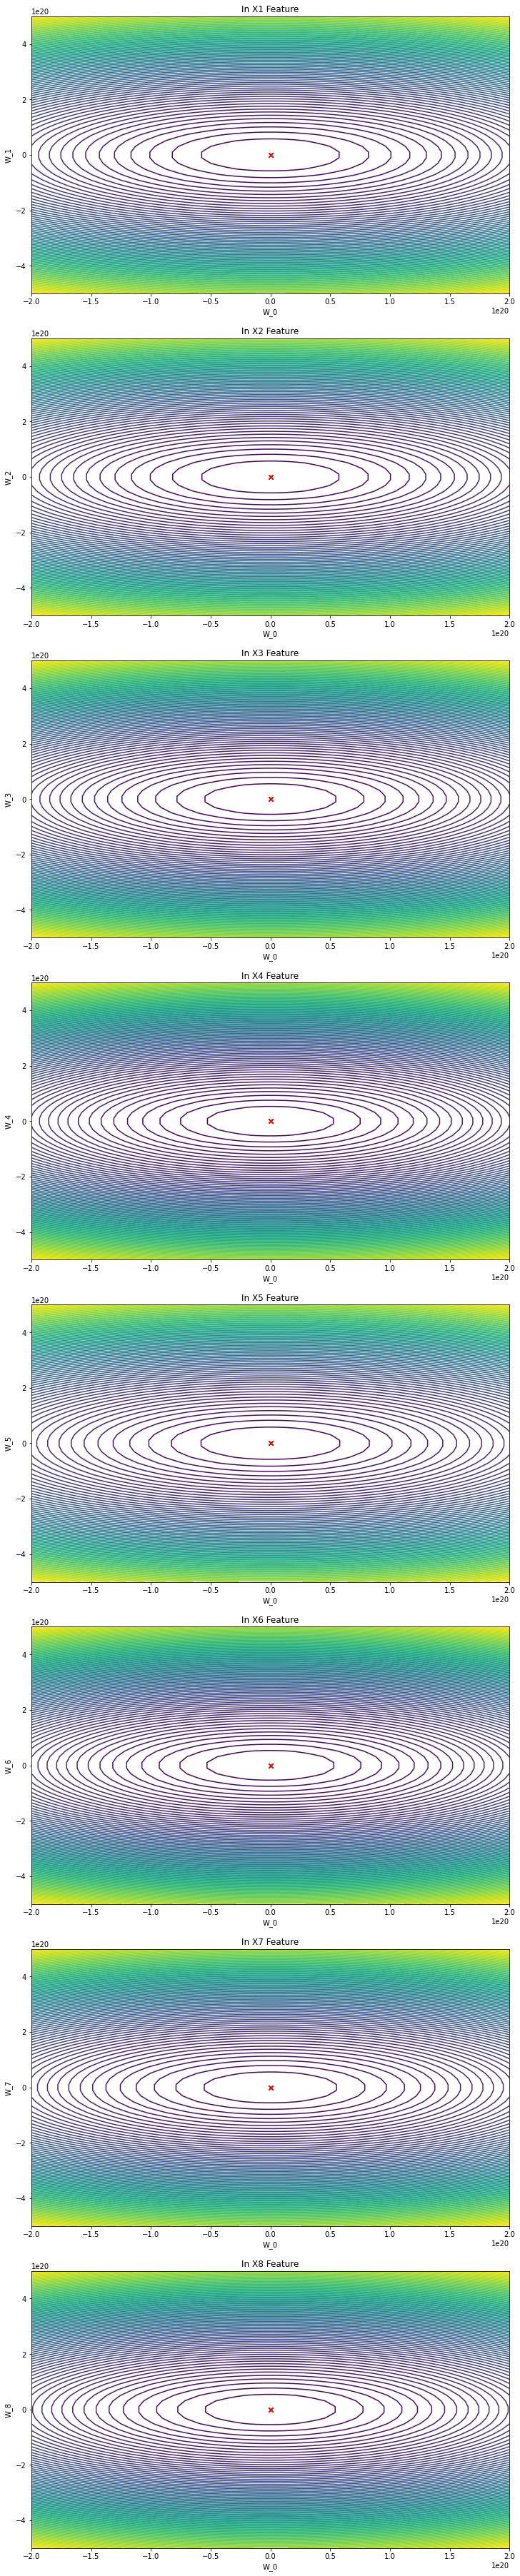

In [ ]:
model_list = Linear_model.getw(x = x_train1, y = y_train1[:,1])            #different weights

fig, axes = plt.subplots(ncols=1, nrows= 8, constrained_layout=True, figsize=(10, 50))
colors = ['r','g', 'b', 'k','y', 'p', 'w', 'br']
for q in range(8):
    cost = lambda w: .5*np.mean((model_list[0] + w*test_data1.loc[:, ['X'+str(q+1)]].to_numpy() - test_data1.loc[:, ['Y2']].to_numpy())**2)         #function to compute the cost
    plot_contour(cost, [-2e+20,2e+20], [-5e+20,5e+20], 50, axes[q])
    for w in model_list:
      axes[q].plot(model_list[0], w, 'x'+colors[0])                 #plot the contours
      axes[q].set_xlabel(r'W_0')
      axes[q].set_ylabel(r'W_'+str(q+1))
      axes[q].set_title('In X'+str(q+1)+' Feature')

plt.show()

Dataset2:

Get data Ready:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


(2) Logisitc Regression for dataset2:

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

In [ ]:
def Logistic_gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.05, epsilon=1e-4, max_iters=1e4, verbose=False, decision_boundry=0.5):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.decision_boundry = decision_boundry

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.Logistic_gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def getw(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.Logistic_gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self.w

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

    def decide(self, yh):
        # Decision Boundry can apply in here
        yh[yh > self.decision_boundry] = 1
        yh[yh < self.decision_boundry] = 0
        return yh

LogisticRegression.Logistic_gradient = Logistic_gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [ ]:
model = LogisticRegression(verbose = True)
yh_data2 = model.fit(x = x_train2, y = y_train2).predict(x = x_test2)


terminated after 10000 iterations, with norm of the gradient equal to 0.006942789431703666
the weight found: [ 0.83492618 -0.05311641 -1.59801286 -0.70768885 -4.60025357  0.32418948
  9.04102398]


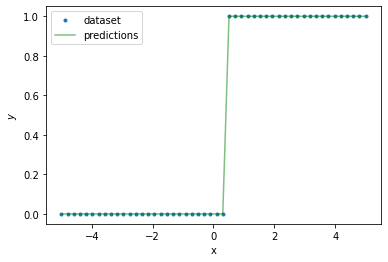

In [ ]:
N = len(x_test2)
x = np.linspace(-5,5, N)
y = ( x < 2).astype(int)
yh = model.decide(yh_data2)
plt.plot(x, y_test2, '.', label='dataset')
plt.plot(x, yh_data2, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

Calculate the MSE ($\hat{Y}_1$):

In [ ]:
def CE(y,yh):
    m = np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))
    return m

In [ ]:
yh_data2 = model.fit(x = x_train2, y = y_train2).predict(x = x_test2)
CE(y_test2,yh_data2)


terminated after 10000 iterations, with norm of the gradient equal to 0.006942789431703666
the weight found: [ 0.83492618 -0.05311641 -1.59801286 -0.70768885 -4.60025357  0.32418948
  9.04102398]


0.04862876956492689

(3) Implement mini_batch for datasets:

Dataset1:

Normalize:

In [ ]:
from sklearn import preprocessing

First way:

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = train_data1.columns
d = scaler.fit_transform(train_data1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df
normalized_train_data1 = scaled_df


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = test_data1.columns
d = scaler.fit_transform(test_data1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df
normalized_test_data1 = scaled_df


second way of normalize:

In [ ]:
scaler = preprocessing.StandardScaler()
names = train_data1.columns
d = scaler.fit_transform(train_data1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df
normalized_train_data1 = scaled_df


In [ ]:
scaler = preprocessing.StandardScaler()
names = test_data1.columns
d = scaler.fit_transform(test_data1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df
normalized_test_data1 = scaled_df


Third way of normalize: (BEST)

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


add or drop features based on other features:

In [ ]:
#normalized_train_data1 = normalized_train_data1.assign(X_add1 = lambda x: x.X1 **2, X_add2 = lambda x: x.X2 **2, X_add3 = lambda x: x.X3 **2)
# normalized_train_data1 = normalized_train_data1.drop(['X6'], axis = 1)
# normalized_train_data1

In [ ]:
#normalized_test_data1 = normalized_test_data1.assign(X_add1 = lambda x: x.X1 **2, X_add2 = lambda x: x.X2 **2, X_add3 = lambda x: x.X3 **2)
# normalized_test_data1 = normalized_test_data1.drop(['X6'], axis = 1)
# normalized_test_data1

Change Data to Numerical:

In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Define Mini-batch for linear regression:

In [ ]:
def Linear_Mini_Batch_Gradient(self, x, y):
    B,D = x.shape
    yh = np.dot(x, self.w)
    grad = np.dot(x.T, yh - y)/B        # B is the size of batch
    return grad

In [ ]:
# batch gradient decsent with shuffling:
class Shuffle_Linear_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e+4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)           #divide train-set into batches
      D = x.shape[1]
      self.w = np.zeros((D, y.shape[1]))
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:

        x = np.column_stack([x,y])      #shuffle the values of each batch in each iter
        np.random.shuffle(x)
        y = x[:, -2:]
        x = x[:, :-2]

        for n in range(B):
          Q = n
          grad = self.Linear_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step

        t += 1
        grad = self.Linear_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step

        if self.record_history:
          self.w_history.append(self.w)
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = np.dot(x,self.w)            #predict output
      return yh

Shuffle_Linear_Mini_batch_GradientDescent.Linear_Mini_Batch_Gradient = Linear_Mini_Batch_Gradient

In [ ]:
class Linear_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e+4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)           #divide train-set into batches
      D = x.shape[1]
      self.w = np.zeros((D, y.shape[1]))
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
        for n in range(B):
          Q = n
          grad = self.Linear_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step
        if self.record_history:
          self.w_history.append(self.w)
        t += 1
        grad = self.Linear_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = np.dot(x,self.w)            #predict output
      return yh

Linear_Mini_batch_GradientDescent.Linear_Mini_Batch_Gradient = Linear_Mini_Batch_Gradient

In [ ]:
GD_Linear_model = Linear_Mini_batch_GradientDescent()
yh_data1_no_sh = GD_Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)

In [ ]:
Shuffle_GD_Linear_model = Shuffle_Linear_Mini_batch_GradientDescent()
yh_data1 = Shuffle_GD_Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)

Plot Real outputs Vs Predicted outputs:

Text(0, 0.5, 'Predicted outputs ($\\hat{Y}_2$)')

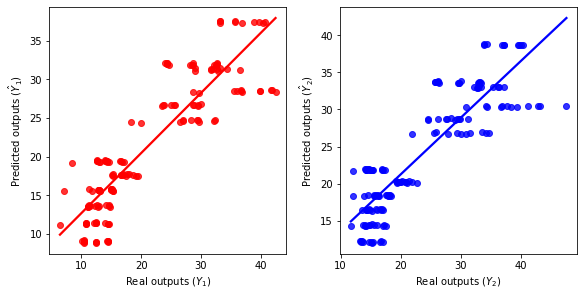

In [ ]:
import seaborn as sns

fig, (axe1, axe2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(8, 4))

sns.regplot(x = y_test1[:,0], y =  yh_data1[:,0], ci=None, color = 'red', label = 'Predicted', ax = axe1)
sns.regplot(x = y_test1[:,1], y =  yh_data1[:,1], ci=None, color = 'blue', label = 'Predicted', ax= axe2)

axe1.set_xlabel('Real outputs ($Y_1$)')
axe2.set_xlabel('Real outputs ($Y_2$)')
axe1.set_ylabel('Predicted outputs ($\hat{Y}_1$)')
axe2.set_ylabel('Predicted outputs ($\hat{Y}_2$)')

Find the Slope:

In [ ]:
!pip install scipy
import scipy as scipy
from scipy.stats import linregress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For $\hat{Y}_1$:

0.777360512587708

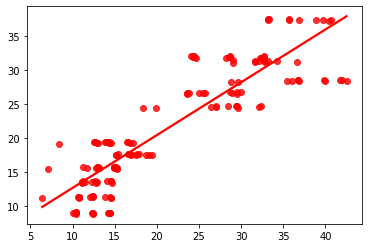

In [ ]:
p = sns.regplot(x = y_test1[:,0], y =  yh_data1[:,0], ci=None, color = 'red', label = 'Predicted')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = p.get_lines()[0].get_xdata(), y = p.get_lines()[0].get_ydata())
slope

For $\hat{Y}_2$:

0.7625873642929768

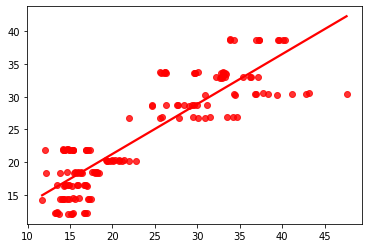

In [ ]:
p = sns.regplot(x = y_test1[:,1], y =  yh_data1[:,1], ci=None, color = 'red', label = 'Predicted')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = p.get_lines()[0].get_xdata(), y = p.get_lines()[0].get_ydata())
slope

In [ ]:
# figure, axes = plt.subplots(ncols = 2, nrows = 1, constrained_layout=True, figsize=(26, 5))
# axes[0].plot(y_test1[:, [0]], label = 'real y', color = 'r')
# axes[0].plot(yh_data1[:, [0]], label = 'predicted y')
# axes[1].plot(y_test1[:, [1]], label = 'real y', color = 'r')
# axes[1].plot(yh_data1[:, [1]], label = 'predicted y')
# plt.legend()
# plt.show()


Calculate the MSE without shuffle (Total $\hat{Y}_1$ and $\hat{Y}_2$):

In [ ]:
MSE(y_test1,yh_data1_no_sh)


9.832428493920599

Calculate the MSE with shuffle (Total $\hat{Y}_1$ and $\hat{Y}_2$):

In [ ]:
MSE(y_test1,yh_data1)


9.736917942520096

Calculate the MSE ($\hat{Y}_1$):

In [ ]:
MSE(y_test1[:,0],yh_data1[:,0])


9.784306040061386

Calculate the MSE ($\hat{Y}_2$):

In [ ]:
MSE(y_test1[:,1],yh_data1[:,1])


9.689529844978805

Dataset2:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


Define Mini-Batch function

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

In [ ]:
def Logistic_Mini_Batch_Gradient(self, x, y):
    B,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/B        # B is the size of Batch
    return grad

In [ ]:
#mini_batch Function with shuffling
class Shuffling_Logistic_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True, decision_boundry = 0.5):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        self.decision_boundry = decision_boundry
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)
      D = x.shape[1]
      self.w = np.zeros(D)
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:

        x = np.column_stack([x,y])      #shuffle the values of each batch in each iter
        np.random.shuffle(x)
        y = pd.DataFrame(x[:, -1:])
        y = y[0].to_numpy()
        x = x[:, :-1]

        for n in range(B):
          Q = B
          grad = self.Logistic_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step
        if self.record_history:
          self.w_history.append(self.w)
        t += 1
        grad = self.Logistic_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = logistic(np.dot(x,self.w))            #predict output
      return yh

    def decision(self, yh):
      yh[yh > self.decision_boundry] = 1
      yh[yh < self.decision_boundry] = 0
      return yh

Shuffling_Logistic_Mini_batch_GradientDescent.Logistic_Mini_Batch_Gradient = Logistic_Mini_Batch_Gradient


In [ ]:
class Logistic_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True, decision_boundry = 0.5):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        self.decision_boundry = decision_boundry
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)
      D = x.shape[1]
      self.w = np.zeros(D)
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
        for n in range(B):
          Q = B
          grad = self.Logistic_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step
        if self.record_history:
          self.w_history.append(self.w)
        t += 1
        grad = self.Logistic_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = logistic(np.dot(x,self.w))            #predict output
      return yh

    def decision(self, yh):
      yh[yh > self.decision_boundry] = 1
      yh[yh < self.decision_boundry] = 0
      return yh

Logistic_Mini_batch_GradientDescent.Logistic_Mini_Batch_Gradient = Logistic_Mini_Batch_Gradient

In [ ]:
Shuffle_logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent()
yh_data2 = Shuffle_logistic_model.run(x = x_train2, y = y_train2).predict(x = x_test2)

In [ ]:
Logistic_model = Logistic_Mini_batch_GradientDescent()
yh_data2_no_sh = Logistic_model.run(x = x_train2, y = y_train2).predict(x = x_test2)

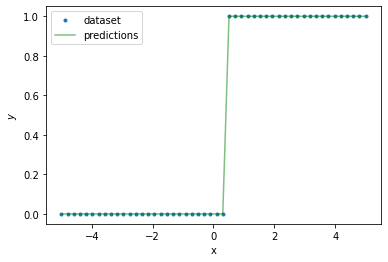

In [ ]:
N = len(x_test2)
x = np.linspace(-5,5, N)
y = ( x < 2).astype(int)
yh = Shuffle_logistic_model.decision(yh_data2)
plt.plot(x, y_test2, '.', label='dataset')
plt.plot(x, yh_data2, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

Calculate the MSE with shuffle ($\hat{Y}_1$):

In [ ]:
yh_data2 = Shuffle_logistic_model.run(x = x_train2, y = y_train2).predict(x = x_test2)
CE(y_test2,yh_data2)


0.008636745521888716

Calculate the MSE without shuffle ($\hat{Y}_1$):

In [ ]:
CE(y_test2,yh_data2_no_sh)


0.0086912439578734

Task 3:

Question 1:

Dataset1:

Split the Dataset to train and test (80/20):

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Get data ready for Prediction:

In [ ]:
x_train1 = train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Add Linear Regression model:

In [ ]:
Full_Linear_Regression = LinearRegression()

In [ ]:
#define a function for the MSE loss
loss = lambda y, yh: 0.5*np.mean((y-yh)**2)

model = Full_Linear_Regression

print('Cost of train for dataset 1 is: ', loss(model.fit(x = x_train1, y = y_train1).predict(x_train1), y_train1))
print('Cost of test  for dataset 1 is: ', loss(model.fit(x = x_train1, y = y_train1).predict(x_test1), y_test1))
print("")
print("")

Cost of train for dataset 1 is:  4.808280525035868
Cost of test  for dataset 1 is:  4.172583053746655




<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Normalize dataset1:

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


Get data ready for Prediction:

In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Calculate the Loss:

In [ ]:
#define a function for the MSE loss
loss = lambda y, yh: 0.5*np.mean((y-yh)**2)

model = Full_Linear_Regression

print('Cost of train for dataset 1 is: ', loss(model.fit(x = x_train1, y = y_train1).predict(x_train1), y_train1))
print('Cost of test  for dataset 1 is: ', loss(model.fit(x = x_train1, y = y_train1).predict(x_test1), y_test1))
print("")
print("")

Cost of train for dataset 1 is:  4.3543356405486655
Cost of test  for dataset 1 is:  3.7538593502767514




<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Dataset 2:

Split the Dataset to train and test (80/20):

In [ ]:
train_data2 = data2.sample(frac = 0.8, random_state = 30)
test_data2  = data2.drop(train_data2.index)

Get data ready for Prediction:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


In [ ]:
Full_Logistic_gradient = LogisticRegression()

In [ ]:
#define a function for the MSE loss
loss = lambda y, yh: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

model = Full_Logistic_gradient

print('The Loss of Test for dataset 2 is: ', loss(y_test2, model.fit(x = x_train2, y = y_train2).predict(x_test2)))
print('The Loss of Train for dataset 2 is: ', loss(y_train2, model.fit(x = x_train2, y = y_train2).predict(x_train2)))

The Loss of Test for dataset 2 is:  0.04862876956492689
The Loss of Train for dataset 2 is:  0.037386609579787865


Question 2:

For Analytical regression of dataset 1 & fully batch dataset 2:

Get data ready for Prediction:

In [ ]:
x_train1 = train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Dataset 1 Weights (Unnormalized):

In [ ]:
Full_Linear_Regression = LinearRegression()
w1 = Full_Linear_Regression.getw(x_train1, y_train1)
w1 = pd.DataFrame(w1, columns = ['Weights of Yh1', 'Weights of Yh2'])
w1

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Weights of Yh1  Weights of Yh2
0   -6.141025e+01   -6.523693e+01
1   -9.437790e+10   -2.170115e+09
2    9.437790e+10    2.170115e+09
3    1.887558e+11    4.340230e+09
4    4.272762e+00    4.507206e+00
5   -1.053115e-01    5.700253e-02
6    2.066228e+01    1.543867e+01
7    2.592133e-01    5.571549e-02
8    7.695202e+01    8.574070e+01

Normalize dataset1:

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


Get data ready for Prediction:

In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Dataset 1 Weights (Normalized):

In [ ]:
Full_Linear_Regression = LinearRegression()
w1 = Full_Linear_Regression.getw(x_train1, y_train1)
w1 = pd.DataFrame(w1, columns = ['Weights of Yh1', 'Weights of Yh2'])
w1

<ipython-input-16-173503370508>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


Weights of Yh1  Weights of Yh2
0   -30439.060274   -30257.690019
1     -418.597263     -394.920623
2     -182.035047     -182.417936
3     -118.281108     -106.251343
4     4415.674036     4600.532266
5      -84.110078       46.807112
6    15129.104515    11243.305531
7      192.047880       38.033030
8      486.059540      464.768788

Dataset 2 weights:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


In [ ]:
Full_Logistic_gradient = LogisticRegression()
w2 = Full_Logistic_gradient.getw(x_train2, y_train2)
w2 = pd.DataFrame(w2, columns = ['Weights of Yh'])
w2

Weights of Yh
0       0.834926
1      -0.053116
2      -1.598013
3      -0.707689
4      -4.600254
5       0.324189
6       9.041024

For mini batched dataset 1 and dataset 2:

Get data ready for Prediction:

In [ ]:
x_train1 = train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Dataset 1 Weights (Unnormalized):

In [ ]:
mini_batch_Linear_Regression = Shuffle_Linear_Mini_batch_GradientDescent()
mini_batch_Linear_Regression.run(x_train1, y_train1)
w1 = mini_batch_Linear_Regression.w_history
w1 = pd.DataFrame(w1[0], columns = ['Weights of Yh1', 'Weights of Yh2'])
w1

<ipython-input-63-ec7b52279c21>:34: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.learning_rate * grad         # weight update step


Weights of Yh1  Weights of Yh2
0   4.781843e+169   5.319971e+169
1   4.639583e+172   5.161703e+172
2   2.100491e+172   2.336872e+172
3   1.269546e+172   1.412415e+172
4   3.054574e+170   3.398323e+170
5   2.430119e+170   2.703594e+170
6   1.619438e+169   1.801682e+169
7   1.459654e+170   1.623918e+170
8   6.590852e+169   7.332559e+169

Normalize dataset1:

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


Get data ready for Prediction:

In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Dataset 1 Weights (Normalized):

In [ ]:
mini_batch_Linear_Regression = Shuffle_Linear_Mini_batch_GradientDescent()
mini_batch_Linear_Regression.run(x_train1, y_train1)
w1 = mini_batch_Linear_Regression.w_history
w1 = pd.DataFrame(w1[-1], columns = ['Weights of Yh1', 'Weights of Yh2'])
w1

Weights of Yh1  Weights of Yh2
0        3.097527        3.883280
1      -36.092799      -29.823706
2       85.918921       81.767126
3      -61.005860      -55.795416
4       62.111535       69.027250
5        6.755893       13.488444
6       10.955180        8.422520
7       48.953517       31.723863
8       31.206565       28.318565

Dataset 2 weights:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


In [ ]:
mini_batch_Logistic_gradient = Shuffling_Logistic_Mini_batch_GradientDescent()
mini_batch_Logistic_gradient.run(x_train2, y_train2)
w2 = mini_batch_Logistic_gradient.w_history
w2 = pd.DataFrame(w2[-1], columns = ['Weights of Yh'])
w2

Weights of Yh
0       0.925663
1      -0.104168
2      -2.523197
3      -1.823756
4      -8.143305
5       0.121538
6      19.213567

Question 3:

Dataset1:

For Linear Regression:

With Normalization:

In [ ]:
from sklearn import preprocessing

<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
<ipython-input-16-173503370508>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use

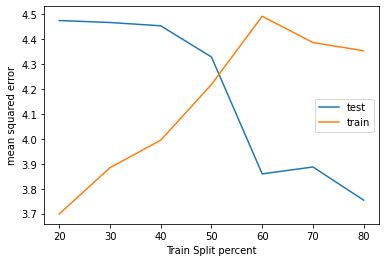

In [ ]:
#define a function for the MSE loss
loss = lambda y, yh: 0.5*np.mean((y-yh)**2)

Split = np.arange(0.2, 0.8, 0.1)
err_train, err_test = [], []

model = LinearRegression()

for i in Split:

  ttrain_data1 = data1.sample(frac = i, random_state = 30)
  ttest_data1  = data1.drop(ttrain_data1.index)

  normalized_train_data1 = preprocessing.normalize(ttrain_data1.to_numpy(), axis = 1)
  names = ttrain_data1.columns
  normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)

  normalized_test_data1 = preprocessing.normalize(ttest_data1.to_numpy(), axis = 1)
  names = ttest_data1.columns
  normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


  x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
  x_train1 = x_train1.to_numpy()

  x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
  x_test1 = x_test1.to_numpy()

  y_train1 = ttrain_data1.loc[:, ['Y1', 'Y2']]
  y_train1 = y_train1.to_numpy()

  y_test1 = ttest_data1.loc[:, ['Y1', 'Y2']]
  y_test1 = y_test1.to_numpy()


  err_test.append([i,loss(model.fit(x = x_train1, y = y_train1).predict(x_test1), y_test1)])
  err_train.append([i,loss(model.fit(x = x_train1, y = y_train1).predict(x_train1), y_train1)])

err_test = np.array(err_test)
err_train = np.array(err_train)

plt.plot(Split*100, err_test[:, 1], '-', label='test')
plt.plot(Split*100, err_train[:, 1], '-', label='train')
plt.legend()
plt.xlabel('Train Split percent')
plt.ylabel('mean squared error')
plt.show()

For Mini-Batch SGD:

With Normalization:

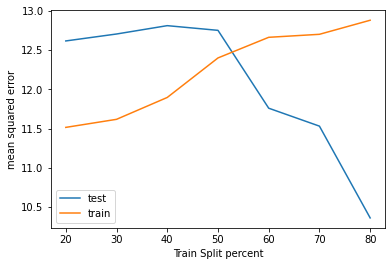

In [ ]:
#define a function for the MSE loss
loss = lambda y, yh: 0.5*np.mean((y-yh)**2)

Split = np.arange(0.2, 0.8, 0.1)
err_train, err_test = [], []

model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate= 0.1, max_iters = 1e+3)

for i in Split:

  ttrain_data1 = data1.sample(frac = i, random_state = 30)
  ttest_data1  = data1.drop(ttrain_data1.index)

  normalized_train_data1 = preprocessing.normalize(ttrain_data1.to_numpy(), axis = 1)
  names = ttrain_data1.columns
  normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)

  normalized_test_data1 = preprocessing.normalize(ttest_data1.to_numpy(), axis = 1)
  names = ttest_data1.columns
  normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


  x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
  x_train1 = x_train1.to_numpy()

  x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
  x_test1 = x_test1.to_numpy()

  y_train1 = ttrain_data1.loc[:, ['Y1', 'Y2']]
  y_train1 = y_train1.to_numpy()

  y_test1 = ttest_data1.loc[:, ['Y1', 'Y2']]
  y_test1 = y_test1.to_numpy()

  err_test.append([i,loss(model.run(x = x_train1, y = y_train1).predict(x_test1), y_test1)])
  err_train.append([i,loss(model.run(x = x_train1, y = y_train1).predict(x_train1), y_train1)])

err_test = np.array(err_test)
err_train = np.array(err_train)

plt.plot(Split*100, err_test[:, 1], '-', label='test')
plt.plot(Split*100, err_train[:, 1], '-', label='train')
plt.legend()
plt.xlabel('Train Split percent')
plt.ylabel('mean squared error')
plt.show()

Dataset2:

For full_batch_SGD

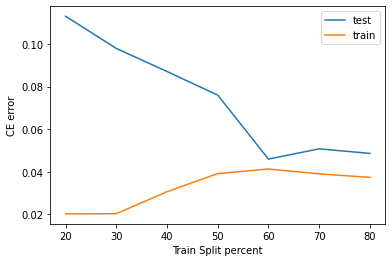

In [ ]:
#define a function for the MSE loss
loss = lambda yh, y: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

Split = np.arange(0.2, 0.8, 0.1)
err_train, err_test = [], []

model = LogisticRegression(max_iters = 1e+4)

for i in Split:

  ttrain_data2 = data2.sample(frac = i, random_state = 30)
  ttest_data2  = data2.drop(ttrain_data2.index)

  x_train2 = ttrain_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
  x_train2 = x_train2.to_numpy()

  x_test2 = ttest_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
  x_test2 = x_test2.to_numpy()

  y_train2 = ttrain_data2.loc[:, ['NB']]
  y_train2 = y_train2['NB'].to_numpy()

  y_test2 = ttest_data2.loc[:, ['NB']]
  y_test2 = y_test2['NB'].to_numpy()

  err_test.append([i,loss(model.fit(x = x_train2, y = y_train2).predict(x_test2), y_test2)])
  err_train.append([i,loss(model.fit(x = x_train2, y = y_train2).predict(x_train2), y_train2)])

err_test = np.array(err_test)
err_train = np.array(err_train)

plt.plot(Split*100, err_test[:, 1], '-', label='test')
plt.plot(Split*100, err_train[:, 1], '-', label='train')
plt.legend()
plt.xlabel('Train Split percent')
plt.ylabel('CE error')
plt.show()


For mini_batch_SGD

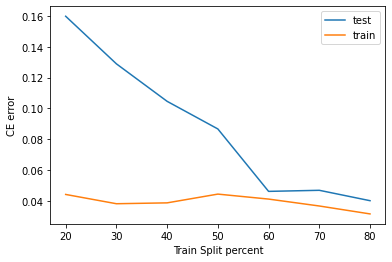

In [ ]:
#define a function for the MSE loss
loss = lambda yh, y: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

Split = np.arange(0.2, 0.8, 0.1)
err_train, err_test = [], []

model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate= 0.05, max_iters = 1e+3)

for i in Split:

  ttrain_data2 = data2.sample(frac = i, random_state = 30)
  ttest_data2  = data2.drop(ttrain_data2.index)

  x_train2 = ttrain_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
  x_train2 = x_train2.to_numpy()

  x_test2 = ttest_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
  x_test2 = x_test2.to_numpy()

  y_train2 = ttrain_data2.loc[:, ['NB']]
  y_train2 = y_train2['NB'].to_numpy()

  y_test2 = ttest_data2.loc[:, ['NB']]
  y_test2 = y_test2['NB'].to_numpy()

  err_test.append([i,loss(model.run(x = x_train2, y = y_train2).predict(x_test2), y_test2)])
  err_train.append([i,loss(model.run(x = x_train2, y = y_train2).predict(x_train2), y_train2)])

err_test = np.array(err_test)
err_train = np.array(err_train)

plt.plot(Split*100, err_test[:, 1], '-', label='test')
plt.plot(Split*100, err_train[:, 1], '-', label='train')
plt.legend()
plt.xlabel('Train Split percent')
plt.ylabel('CE error')
plt.show()


Question 4:

Dataset 1:

Split the Dataset to train and test (80/20):

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Get data ready for Prediction:

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Define Plot:

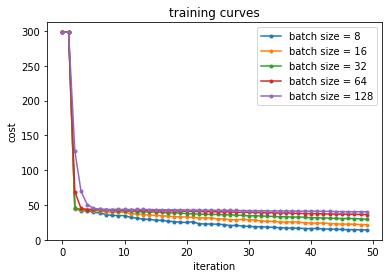

In [ ]:
cost = lambda y, yh: 0.5*np.mean((y-yh)**2)

batch_size = [8, 16, 32, 64, 128, 256]
lern_rate = [.001, .01, 0.1, 1]
iter_size = range(0,50)

c = []

for q, bt in enumerate(batch_size):
  if bt != 8:
    plt.plot(c, marker= '.', alpha=.998, label =(f'batch size = {batch_size[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = 0.05, Batch_size = bt, max_iters = iter)
    yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)            #different weights
    c.append([cost(yh,y_test1)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_linear.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_linear.pdf')


In [ ]:
# Batch_size = 16
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = 0.05, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

9.758965640794

In [ ]:
# Batch_size = 32
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .05, Batch_size = 32, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

9.978071035147929

In [ ]:
# Batch_size = 64
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .05, Batch_size = 64, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

9.940177479379871

Different batches with different learning rates:

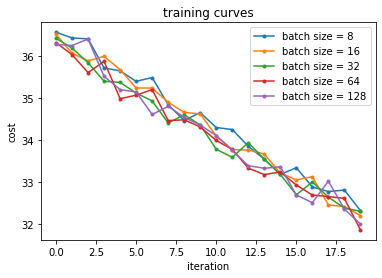

In [ ]:
cost = lambda y, yh: 0.5*np.mean((y-yh)**2)

batch_size = [8, 16, 32, 64, 128, 256]
lern_rate = [.01, .02, .04, 0.08, 0.16, 0.32]
iter_size = range(30,50)

c = []

for q, bt in enumerate(batch_size):
  if bt != 8:
    plt.plot(c, marker= '.', alpha=.998, label =(f'batch size = {batch_size[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = lern_rate[q], Batch_size = bt, max_iters = iter)
    yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)            #different weights
    c.append([cost(yh,y_test1)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_linear.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_linear.pdf')


Dataset 2:

Get data ready for Prediction:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


Define Plot:

<ipython-input-68-14f86a827256>:4: RuntimeWarning: invalid value encountered in true_divide
  grad = np.dot(x.T, yh - y)/B        # B is the size of Batch


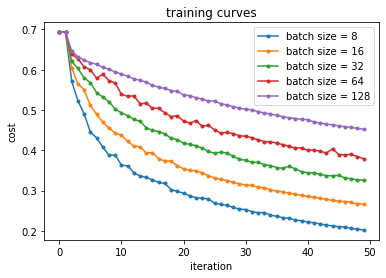

In [ ]:
cost = lambda yh, y: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

batch_size = [8, 16, 32, 64, 128, 256]
lern_rate = [.001, .01, 0.1, 1]
iter_size = range(0,50)

c = []

for q, bt in enumerate(batch_size):
  if bt != 8:
    plt.plot(c, marker= '.', alpha=.998, label =(f'batch size = {batch_size[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = 0.05, Batch_size = bt, max_iters = iter)
    yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)            #different weights
    c.append([cost(yh,y_test2)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_logistic.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_logistic.pdf')


Different batches with different learning rates:

<ipython-input-68-14f86a827256>:4: RuntimeWarning: invalid value encountered in true_divide
  grad = np.dot(x.T, yh - y)/B        # B is the size of Batch


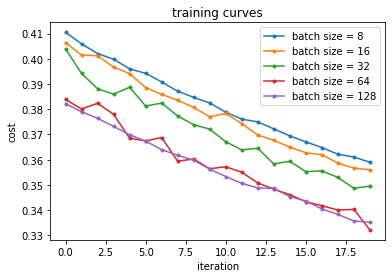

In [ ]:
cost = lambda yh, y: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

batch_size = [8, 16, 32, 64, 128, 256]
lern_rate = [.01, .02, 0.04, 0.08, 0.16, 0.32]
iter_size = range(30,50)

c = []

for q, bt in enumerate(batch_size):
  if bt != 8:
    plt.plot(c, marker= '.', alpha=.998, label =(f'batch size = {batch_size[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = lern_rate[q], Batch_size = bt, max_iters = iter)
    yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)            #different weights
    c.append([cost(yh,y_test2)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_logistic.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_logistic.pdf')


Question 5:

Dataset 1:

Split the Dataset to train and test (80/20):

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Get data ready for Prediction:

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


Define Plot:

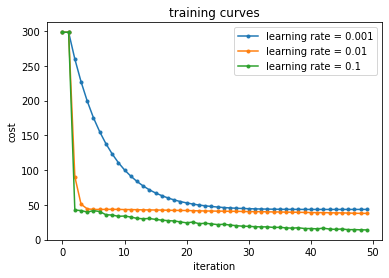

In [ ]:
cost = lambda y, yh: 0.5*np.mean((y-yh)**2)

batch_size = [8, 16, 32, 64]
lern_rate = [.001, .01, 0.1, 1]
iter_size = range(0,50)

c = []

for q, lr in enumerate(lern_rate):
  if lr != .001:
    plt.plot(c, marker= '.', alpha=.998, label =(f'learning rate = {lern_rate[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = lr, Batch_size = 16, max_iters = iter)
    yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)            #different weights
    c.append([cost(yh,y_test1)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_linear.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_linear.pdf')


See The MSE for different learning rates

In [ ]:
# Learning rate =0.001
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .001, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

10.443003688358662

In [ ]:
# Learning rate =0.01
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .01, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

9.980703537811152

In [ ]:
# Learning rate =0.1
Linear_model = Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .1, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

9.588451702329357

Dataset 2:

Get data ready for Prediction:

In [ ]:
x_train2 = train_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_train2 = x_train2.to_numpy()

x_test2 = test_data2.loc[:, ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']]
x_test2 = x_test2.to_numpy()

y_train2 = train_data2.loc[:, ['NB']]
y_train2 = y_train2['NB'].to_numpy()

y_test2 = test_data2.loc[:, ['NB']]
y_test2 = y_test2['NB'].to_numpy()


Define Plot:

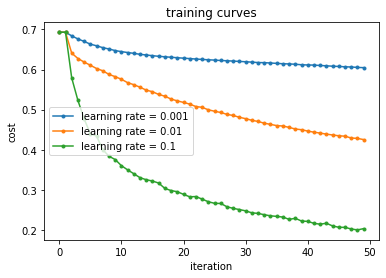

In [ ]:
cost = lambda yh, y: np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))

batch_size = [8, 16, 32, 64]
lern_rate = [.001, .01, 0.1, 2]
iter_size = range(0,50)

c = []

for q, lr in enumerate(lern_rate):
  if lr != 0.001:
    plt.plot(c, marker= '.', alpha=.998, label =(f'learning rate = {lern_rate[q-1]}') )
    c = []

  for i, iter in enumerate(iter_size):
    Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = lr, Batch_size = 16, max_iters = iter)
    yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)            #different weights
    c.append([cost(yh,y_test2)])

plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training curves')
plt.legend()
plt.show()
# from google.colab import files
# plt.savefig('Learning_rate_logistic.pdf', format='pdf', bbox_inches='tight')
# files.download('Learning_rate_logistic.pdf')


See The MSE for different learning rates

In [ ]:
# Learning rate =0.001
Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = .001, Batch_size = 16, max_iters = 1e+4)
yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)
CE(y_test2, yh)

0.13011482418323506

In [ ]:
# Learning rate =0.01
Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = .01, Batch_size = 16, max_iters = 1e+4)
yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)
CE(y_test2, yh)

0.024232734064028302

In [ ]:
# Learning rate =0.1
Logistic_model = Shuffling_Logistic_Mini_batch_GradientDescent(learning_rate = .1, Batch_size = 16, max_iters = 1e+4)
yh = Logistic_model.run(x = x_train2, y = y_train2).predict(x_test2)
CE(y_test2, yh)

0.00583724918876828

Additional Tasks:

L1 Regularization:

Normalized Dataset 1:

In [ ]:
def L1_Reg_Linear_Mini_Batch_Gradient(self, x, y, lambdaa = 0.1):
    B,D = x.shape
    yh = np.dot(x, self.w)
    grad = np.dot(x.T, yh - y)/B        # B is the size of batch
    grad[1:] += lambdaa * np.sign(self.w[1:])
    return grad

In [ ]:
# batch gradient decsent with shuffling:
class L1_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e+4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)           #divide train-set into batches
      D = x.shape[1]
      self.w = np.zeros((D, y.shape[1]))
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:

        x = np.column_stack([x,y])      #shuffle the values of each batch in each iter
        np.random.shuffle(x)
        y = x[:, -2:]
        x = x[:, :-2]

        for n in range(B):
          Q = n
          grad = self.L1_Reg_Linear_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step

        t += 1
        grad = self.L1_Reg_Linear_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step

        if self.record_history:
          self.w_history.append(self.w)
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = np.dot(x,self.w)            #predict output
      return yh

L1_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent.L1_Reg_Linear_Mini_Batch_Gradient = L1_Reg_Linear_Mini_Batch_Gradient

Split the Dataset to train and test (80/20):

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Get data ready for Prediction:

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


In [ ]:
# Learning rate =0.1
Linear_model = L1_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .1, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

12.74032819512812

L2 Regularization:

Normalized Dataset 1:

In [ ]:
def L2_Reg_Linear_Mini_Batch_Gradient(self, x, y, lambdaa = 0.01):
    B,D = x.shape
    yh = np.dot(x, self.w)
    grad = np.dot(x.T, yh - y)/B        # B is the size of batch
    grad[1:] += lambdaa * self.w[1:]
    return grad

In [ ]:
# batch gradient decsent with shuffling:
class L2_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e+4, epsilon=1e-8, record_history=True, Batch_size = 16, add_bias = True):
        self.Batch_size = Batch_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.add_bias = add_bias
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, x, y):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      B = int(x.shape[0]/self.Batch_size)           #divide train-set into batches
      D = x.shape[1]
      self.w = np.zeros((D, y.shape[1]))
      grad = np.inf
      t = 1
      Q = 1
      while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:

        x = np.column_stack([x,y])      #shuffle the values of each batch in each iter
        np.random.shuffle(x)
        y = x[:, -2:]
        x = x[:, :-2]

        for n in range(B):
          Q = n
          grad = self.L2_Reg_Linear_Mini_Batch_Gradient(x[n*self.Batch_size : (n+1)*self.Batch_size], y[n*self.Batch_size : (n+1)*self.Batch_size])               # compute the gradient with present weight
          self.w = self.w - self.learning_rate * grad         # weight update step

        t += 1
        grad = self.L2_Reg_Linear_Mini_Batch_Gradient(x[Q*self.Batch_size : ], y[Q*self.Batch_size : ])               # compute the gradient with present weight
        self.w = self.w - self.learning_rate * grad         # weight update step

        if self.record_history:
          self.w_history.append(self.w)
      return self

    def predict(self, x):
      Nt = x.shape[0]
      if self.add_bias:
        x = np.column_stack([x,np.ones(Nt)])
      yh = np.dot(x,self.w)            #predict output
      return yh

L2_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent.L2_Reg_Linear_Mini_Batch_Gradient = L2_Reg_Linear_Mini_Batch_Gradient

Split the Dataset to train and test (80/20):

In [ ]:
train_data1 = data1.sample(frac = 0.8, random_state = 30)
test_data1  = data1.drop(train_data1.index)

Get data ready for Prediction:

In [ ]:
from sklearn import preprocessing

In [ ]:
normalized_train_data1 = preprocessing.normalize(train_data1.to_numpy(), axis = 1)
names = train_data1.columns
normalized_train_data1 = pd.DataFrame(normalized_train_data1, columns = names)


In [ ]:
normalized_test_data1 = preprocessing.normalize(test_data1.to_numpy(), axis = 1)
names = test_data1.columns
normalized_test_data1 = pd.DataFrame(normalized_test_data1, columns = names)


In [ ]:
x_train1 = normalized_train_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_test_data1.loc[:, ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
x_test1 = x_test1.to_numpy()

y_train1 = train_data1.loc[:, ['Y1', 'Y2']]
y_train1 = y_train1.to_numpy()

y_test1 = test_data1.loc[:, ['Y1', 'Y2']]
y_test1 = y_test1.to_numpy()


In [ ]:
# Learning rate =0.1
Linear_model = L2_Reg_Regression_Shuffle_Linear_Mini_batch_GradientDescent(learning_rate = .1, Batch_size = 16, max_iters = 1e+4)
yh = Linear_model.run(x = x_train1, y = y_train1).predict(x_test1)
MSE(y_test1, yh)

23.690440708119898